In [28]:
import pandas as pd
import time
import sys
import warnings
import os
import numpy as np
warnings.filterwarnings('ignore')

PATH_DATASET = '../Dataset/'
#PATH_DATASET = '../Dataset/datah-m1-challange/'
PATH_RESULTS = '../Results/'
SEED = 42
ENCODING_CAT = False
pd.set_option('display.max_columns', 500)

In [29]:
import glob

In [30]:
submission_top_reference = 'sub_tr01_val_c_model_v1_2.1022_test_2.0908_local_3.18103_kaggle.csv'

In [31]:
#ensembling 5  no :(
mejores = []

mejores  += glob.glob(os.path.join(PATH_RESULTS,'submissions','ensemble','*.csv'))

n = len(mejores)
results = np.zeros((52959,))
i=0

for i in range(n):
    results += pd.read_csv(mejores[i])['QTT']

In [32]:
df_sample = pd.read_pickle(os.path.join(PATH_RESULTS,'dataset','submission_sample.pkl'))
df_sample.reset_index(drop=True,inplace=True)
print(df_sample.shape)
df_sample['QTT'] = results/n
df_sample.head()

(52959, 9)


,ID,QTT,DATE,S100,I100,C100,C101,item_id,date_block_num
0,2021-12-19_0_1_12_76,2.117838,2021-12-19,0,1,12,76,1_12_76,258
1,2021-12-19_0_1_12_140,1.698999,2021-12-19,0,1,12,140,1_12_140,258
2,2021-12-19_0_1_12_164,1.689691,2021-12-19,0,1,12,164,1_12_164,258
3,2021-12-19_0_1_12_201,1.499760,2021-12-19,0,1,12,201,1_12_201,258
4,2021-12-19_0_1_12_339,1.517045,2021-12-19,0,1,12,339,1_12_339,258


In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


saving..
ensembling_03_todo_comprobacion.csv
../Results/submissions/ensembling_03_todo_comprobacion.csv


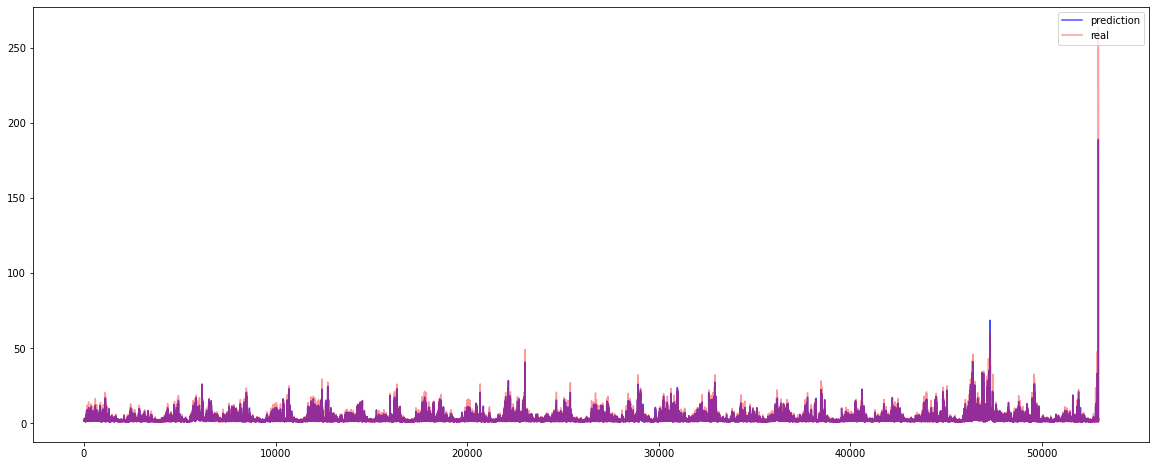

Final score mean_squared_error
Score train: 0.6849793223628255


In [34]:
save = True
if save:
    filename_submission= 'ensembling_03_todo_comprobacion.csv'
    print('saving..')
    print(filename_submission)
    file = os.path.join(PATH_RESULTS,'submissions',filename_submission)
    print(file)
    df_sample[['ID','QTT']].to_csv(file,index=None)
result = pd.read_csv(os.path.join(PATH_RESULTS,'submissions',submission_top_reference))


df_sample['QTT_reference']= result['QTT'].copy()
df_sample[['QTT_reference','QTT']][-20:]

fig = plt.figure(figsize=(20,8))
plt.plot(df_sample['QTT'],'b', alpha=0.7)
plt.plot(result['QTT'],'r', alpha=0.4)
plt.legend(["prediction", "real"], loc ="upper right")
plt.show()

#######
difference = mean_squared_error(df_sample['QTT'],result['QTT'], squared=False)

print('Final score mean_squared_error')
print('Score train:',difference)